# Reservoir Computing (RC)

Reservoir computing (RC) is a machine-learning algorithm that aims to reduce the computational resources required for predicting time series without reducing accuracy. It consists of three main components: an input layer, a reservoir layer, and an output layer. The RC training process is faster compared to backpropagation through time.

![](https://www.researchgate.net/profile/Sandeep-Pandey-20/publication/346040745/figure/fig3/AS:960177943625730@1605935669389/The-basic-architecture-of-a-reservoir-computing-model-RCM-or-echo-state-network-ESN.png)

The readout layer can then be implemented as a linear optical device that combines the output signals of the reservoir in some way. The weights of this device are then optimized to perform a particular task, such as classifying the input signals or predicting future signals. This training process could involve a standard optimization algorithm such as stochastic gradient descent or any other algorithm that can optimize a linear model

## Components of RC

1. Input Layer: Receives input signals, denoted by $u(t) \in \mathbb{R}^{N_{\text{in}}}$, where $N_{\text{in}}$ is the dimension of the inputs.
2. Reservoir Layer: Neurons in this layer are randomly connected. The states of the reservoir are denoted by $x(t) \in \mathbb{R}^{N_{\text{res}}}$. The reservoir layer performs a nonlinear transformation on the input signals.
3. Output Layer: Denoted by $y(t) \in \mathbb{R}^{N_{\text{out}}}$, this layer combines the reservoir states to produce the outputs.

## Mathematical Representation

In the mathematical representation of RC, the following vector variables are defined:

- Inputs: $u(t) \in \mathbb{R}^{N_{\text{in}}}$
- Reservoir States: $x(t) \in \mathbb{R}^{N_{\text{res}}}$
- Outputs: $y(t) \in \mathbb{R}^{N_{\text{out}}}$
- Teaching Signals: $y^{\text{tc}}(t) \in \mathbb{R}^{N_{\text{out}}}$

The updates of the reservoir states are given by the equation:

$$x(t) = \tanh(W^{\text{res}} x(t-1) + W^{\text{in}} u(t))$$

- $W^{\text{in}} \in \mathbb{R}^{N_{\text{res}} \times N_{\text{in}}}$: Weight matrix representing connections from the input layer to the reservoir layer. Elements are drawn from a uniform distribution $U(-\rho_{\text{in}}, \rho_{\text{in}})$.
- $W^{\text{res}} \in \mathbb{R}^{N_{\text{res}} \times N_{\text{res}}}$: Weight matrix representing connections among the neurons in the reservoir layer. Elements are initialized by drawing values from a uniform distribution $U(-1, 1)$ and dividing them by a positive value to ensure the spectral radius of $W^{\text{res}}$ is $\rho_{\text{res}}$.

The outputs are obtained by:

$$y(t) = W^{\text{out}} x(t)$$

- $W^{\text{out}} \in \mathbb{R}^{N_{\text{out}} \times N_{\text{res}}}$: Weight matrix representing connections from the reservoir layer to the output layer.

## Training Process

The output weight matrix $W^{\text{out}}$ is trained in the offline learning process of RC using the pseudoinverse.

The training procedure in RC involves training the output weights by minimizing the error between the predicted outputs and the target outputs. The error is typically measured using a loss function, such as the squared Euclidean distance.

The objective is to minimize the following loss function:

$$\sum_{t=1}^{T} \| y(t) - y^{\text{tc}}(t) \|_2^2$$

where $\| \cdot \|_2$ denotes the Euclidean norm.

The optimization algorithm commonly used to minimize this loss function is the pseudoinverse. By applying the pseudoinverse, the optimal output weight matrix $W^{\text{out}}$ can be obtained as follows:

$$W^{\text{out}} = (X X^T + \beta I)^{-1} X Y^{\text{tc}}$$

where:
- $X$ is the matrix of reservoir states $x(t)$ for all time steps, stacked vertically.
- $Y^{\text{tc}}$ is the matrix of target outputs $y^{\text{tc}}(t)$ for all time steps, stacked vertically.
- $\beta$ is a regularization parameter.
- $I$ is the identity matrix.

Once the output weights $W^{\text{out}}$ are obtained, they can be used to make predictions for new inputs by multiplying them with the corresponding reservoir states:

$$\hat{y}(t) = W^{\text{out}} x(t)$$

The training process aims to find the output weights that minimize the discrepancy between the predicted outputs $\hat{y}(t)$ and the target outputs $y^{\text{tc}}(t)$, thus enabling accurate predictions for future inputs.


## Applications of RC

RC has shown high performance in various time-series forecasting tasks, including chaotic time-series, weather prediction, wind-power generation, and finance. It has also been applied in control engineering and video processing.

To develop applications for RC in edge computing, hardware implementations have been proposed. These implementations employ different variants of RC models and physical systems such as photonics, spintronics, mechanical oscillators, and analog integrated electronic circuits.



$$x(t) = \tanh(W^{\text{res}} x(t-1) + W^{\text{in}} u(t))$$

- $x(t)$ represents the reservoir states at time $t$. These states capture the current state of the reservoir layer, which is a collection of neurons.
- $W^{\text{res}}$ is the weight matrix representing the connections among the neurons in the reservoir layer. It has dimensions $N_{\text{res}} \times N_{\text{res}}$, where $N_{\text{res}}$ is the number of neurons in the reservoir layer. The elements of $W^{\text{res}}$ are initialized by drawing values from a uniform distribution $U(-1, 1)$ and dividing them by a positive value to ensure the spectral radius of $W^{\text{res}}$ is $\rho_{\text{res}}$.
- $x(t-1)$ denotes the reservoir states at the previous time step. It represents the state of the reservoir layer in the previous time step, and it is a vector with dimensions $N_{\text{res}}$.
- $W^{\text{in}}$ is the weight matrix representing the connections from the input layer to the reservoir layer. It has dimensions $N_{\text{res}} \times N_{\text{in}}$, where $N_{\text{in}}$ is the dimension of the inputs. The elements of $W^{\text{in}}$ are drawn from a uniform distribution $U(-\rho_{\text{in}}, \rho_{\text{in}})$, which is centered around zero.
- $u(t)$ represents the input signals at time $t$. These signals are provided to the reservoir layer for processing and are a vector with dimensions $N_{\text{in}}$.
- $\tanh(\cdot)$ is the hyperbolic tangent function, which is a commonly used activation function in reservoir computing. It squashes the values between -1 and 1, allowing the reservoir states to capture nonlinear dynamics and information.

Now, let's understand how the equation works. At each time step $t$, the equation calculates the reservoir states $x(t)$ based on the following components:

1. $W^{\text{res}} x(t-1)$: This term represents the influence of the previous reservoir states on the current states. It is the result of multiplying the weight matrix $W^{\text{res}}$ with the previous reservoir states $x(t-1)$. This component captures the dynamics and dependencies within the reservoir layer.

2. $W^{\text{in}} u(t)$: This term represents the influence of the input signals on the current reservoir states. It is the result of multiplying the weight matrix $W^{\text{in}}$ with the input signals $u(t)$. This component allows the input signals to interact with the reservoir layer, influencing its dynamics.

3. $\tanh(\cdot)$: After combining the two components, the hyperbolic tangent activation function $\tanh(\cdot)$ is applied element-wise to the sum. This activation function introduces nonlinearity and helps in capturing complex relationships within the reservoir.

The resulting output of $\tanh(W^{\text{res}} x(t-1) + W^{\text{in}} u(t))$ is the updated reservoir states $x(t)$ at the current time step. These updated states are then used as the input for the next time step, allowing the reservoir layer to evolve and capture the temporal dependencies of the input signals.

In summary, the equation $\displaystyle x(t) = \tanh(W^{\text{res}} x(t-1) + W^{\text{in}} u(t))$ describes the computation of the reservoir states at each time step, considering the influence of the previous reservoir states and the input signals.

## Script Overview

The XOR problem is a simple task often used as a proof of concept for learning algorithms. It involves the XOR (exclusive or) function, a binary operation that takes two bits and returns 1 if exactly one of the bits is 1, and 0 otherwise. The function is defined for four possible inputs as follows:

- XOR(0, 0) = 0
- XOR(0, 1) = 1
- XOR(1, 0) = 1
- XOR(1, 1) = 0

In this script, we define a simple RNN architecture, often called a reservoir network, to learn this function.

The main components of the script include:
1. Setting up the parameters
2. Generating the input and target data
3. Defining the reservoir network
4. Defining the loss function and the optimizer
5. Running the training loop
6. Testing the trained model



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the parameters
N_in = 2  # Input dimension
N_res = 50  # Reservoir size
N_out = 1  # Output dimension
spectral_radius = 0.9  # Spectral radius of the reservoir weight matrix
regularization = 1e-6  # Regularization parameter

# Generate random input data for XOR
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
target_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Define the reservoir network
class ReservoirNet(nn.Module):
    def __init__(self):
        super(ReservoirNet, self).__init__()
        self.W_in = nn.Parameter(torch.FloatTensor(N_in, N_res).uniform_(-1, 1))
        self.W_res = nn.Parameter(torch.FloatTensor(N_res, N_res).uniform_(-1, 1))
        self.W_out = nn.Parameter(torch.FloatTensor(N_res, N_out).normal_())

    def forward(self, inputs):
        batch_size = inputs.size(0)
        reservoir_states = torch.zeros((batch_size, N_res))
        for i in range(inputs.size(1)):
            reservoir_states = torch.tanh(torch.matmul(inputs[:, i, :], self.W_in) +
                                          torch.matmul(reservoir_states, self.W_res))
        output = torch.matmul(reservoir_states, self.W_out)
        return output

# Create the reservoir network
reservoir_net = ReservoirNet()

# Define the loss function
loss_fn = nn.MSELoss()

# Define the optimizer
optimizer = optim.SGD(reservoir_net.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = torch.tensor(input_data).unsqueeze(1)
    targets = torch.tensor(target_data)

    # Forward pass
    output = reservoir_net(inputs)

    # Compute the loss
    loss = loss_fn(output, targets)

    # Zero the gradients, perform backward pass and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

# Test the trained model
test_inputs = torch.tensor(input_data).unsqueeze(1)
test_output = reservoir_net(test_inputs)
print("Test Output:")
print(test_output.detach().numpy())


Epoch: 0, Loss: 3.0602617263793945
Epoch: 100, Loss: 0.06333312392234802
Epoch: 200, Loss: 0.007163455709815025
Epoch: 300, Loss: 0.0008232593536376953
Epoch: 400, Loss: 9.485641930950806e-05
Epoch: 500, Loss: 1.0935492355201859e-05
Epoch: 600, Loss: 1.2613033959496533e-06
Epoch: 700, Loss: 1.4541862469741318e-07
Epoch: 800, Loss: 1.6778720635102218e-08
Epoch: 900, Loss: 1.965409168747101e-09
Test Output:
[[0.0000000e+00]
 [9.9998242e-01]
 [9.9998283e-01]
 [2.0146370e-05]]


print the output of the network when the new test input is passed in. The output tensor is detached from the computation graph and converted back to a numpy array for easier viewing.

In [2]:
new_input_data = np.array([[0.0, 1.0]], dtype=np.float32)
# Convert the new input data to a PyTorch tensor
new_test_inputs = torch.tensor(new_input_data).unsqueeze(1)

# Pass the new test inputs through the reservoir network
new_test_output = reservoir_net(new_test_inputs)

# Print the new test output
print("New Test Output:")
print(new_test_output.detach().numpy())

New Test Output:
[[0.9999824]]


# Reservoir network using Photontorch and PyTorch 

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from tqdm.notebook import trange
import photontorch as pt


Buffer containing:
Buffer([], dtype=torch.int64)
2.31 0.21 3.09 3.49


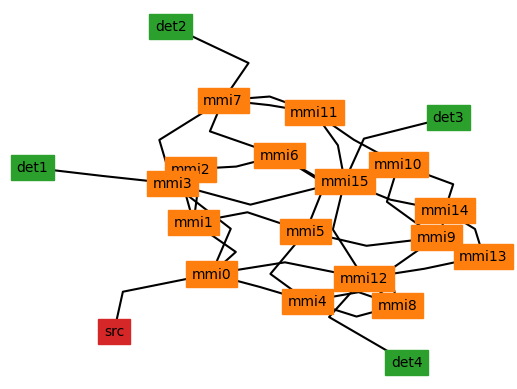

In [4]:
class Combiner(pt.Component):
    def __init__(self, num_inputs, name=None):
        self.num_inputs = num_inputs
        self.num_ports = num_inputs + 1
        pt.Component.__init__(self, name=name)
    def set_S(self, S):
        S[0, :, :self.num_inputs, -1] = 1
        S[0, :, -1, :self.num_inputs] = 1
        
class AllPassNetwork(pt.Network):
    def __init__(self):
        super(AllPassNetwork, self).__init__()
        self.src = pt.Source() # Input source
        weights_real = np.random.random((2, 2))
        weights_imag = np.random.random((2, 2))
        weights_complex = weights_real + 1j*weights_imag
        weights=weights_complex
        self.mmi0 = pt.Mmi(weights=weights_complex,trainable=False)
        self.mmi1 = pt.Mmi(weights=weights_complex,trainable=False)
        self.mmi2 = pt.Mmi(weights=weights_complex,trainable=False)
        self.mmi3 = pt.Mmi(weights=weights,trainable=False)
        self.mmi4 = pt.Mmi(weights=weights,trainable=False)
        self.mmi5 = pt.Mmi(weights=weights,trainable=False)
        self.mmi6 = pt.Mmi(weights=weights,trainable=False)
        self.mmi7 = pt.Mmi(weights=weights,trainable=False)
        self.mmi8 = pt.Mmi(weights=weights,trainable=False)
        self.mmi9 = pt.Mmi(weights=weights,trainable=False)
        self.mmi10 = pt.Mmi(weights=weights,trainable=False)
        self.mmi11 = pt.Mmi(weights=weights,trainable=False)
        self.mmi12 = pt.Mmi(weights=weights,trainable=False)
        self.mmi13 = pt.Mmi(weights=weights,trainable=False)
        self.mmi14 = pt.Mmi(weights=weights,trainable=False)
        self.mmi15 = pt.Mmi(weights=weights,trainable=False)
                
        self.det1 = pt.Detector() # Output detector
        self.det2 = pt.Detector() # Output detector
        self.det3 = pt.Detector() # Output detector
        self.det4 = pt.Detector()
        
        self.link('src:0','0:mmi0:2','0:mmi1:2','1:mmi2:3','1:mmi3:2','0:mmi7:2','1:mmi11:3','1:mmi15:2',
                  '1:mmi14:3','0:mmi13:2','1:mmi12:2','1:mmi8:3','1:mmi4:3','1:mmi0')
        
        self.link('mmi0:3','0:mmi3')
        self.link('mmi1:3','0:mmi2')
        self.link('mmi2:2','0:mmi6')
        self.link('mmi5:3','1:mmi1')
        self.link('mmi3:3','0:mmi15')
        self.link('mmi7:3','0:mmi11')
        self.link('mmi6:2','1:mmi10')
        self.link('mmi9:3','1:mmi5')
        self.link('mmi4:2','0:mmi5:2','1:mmi6:3','1:mmi7')
        self.link('mmi11:2','0:mmi10:2','0:mmi9:2','0:mmi8')
        self.link('mmi10:3','0:mmi14:2','1:mmi13:3','1:mmi9')
        self.link('mmi15:3','0:mmi12:3','0:mmi0')
        self.link('mmi8:2','0:mmi4')

        self.link('mmi3:3','0:det1')
        self.link('mmi7:3','0:det2')
        self.link('mmi15:3','0:det3')
        self.link('mmi12:3','0:det4')

nw = AllPassNetwork()        
nw.graph()
print(torch.where(AllPassNetwork().free_ports_at)[0])
total_time = 15.5e-12 # total time to simulate
dt = 1e-14 # timestep of the simulation
time = torch.arange(0, total_time, dt) # time array
with pt.Environment(t=time):
    nw(source=1)[-1,0,:,0]
    print(' '.join(['%.2f'%w for w in nw(source=1)[-1,0,:,0]]))

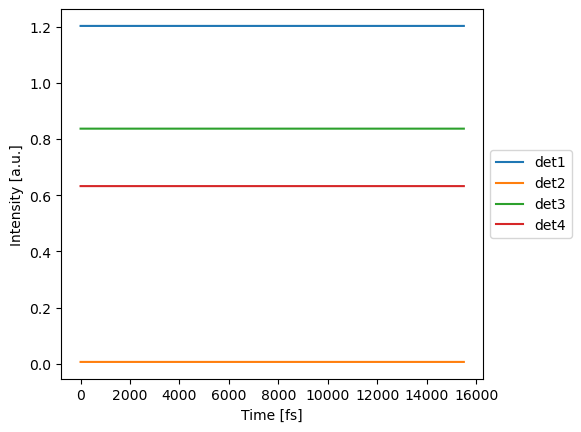

In [5]:
total_time = 15.5e-12 # total time to simulate
dt = 1e-14 # timestep of the simulation
time = torch.arange(0, total_time, dt) # time array

# Set the environment for time-domain simulation
with pt.Environment(t=time):
    # Create the reservoir network
    nw = AllPassNetwork() 

    # Run the simulation with a constant source of 1
    detected = nw(source=1)

    # Plot the output power over time
    nw.plot(detected)


In [6]:
c = 299792458.0 #[m/s] speed of light
Rb = 20e9 #[1/s] bitrate
Rs = 320e9 #[1/s] samplerate
fc = 20e9 #[1/s] cutoff frequency for bit generation
wl0 = 1550e-9 #[m] center wavelength
neff = 2.34 #[1] effective index
ng = 3.4 #[1] group index
N = 100 #[1] number of bits per bit stream
B = 10 #[1] number of bit streams in training batch
Str, Sva, Ste = (1, 2, 3) #[1] train seed, validation seed, test seed
Lr = (1/Rb) * (c/ng) #[m] reference length (distance the signal travels during one bit period)
device = torch.device("cpu") # default device used
torch.set_default_dtype(torch.float32) # default dtype used
torch.manual_seed(123) # pytorch seed
np.random.seed(42) # numpy seed

In [7]:
class BitGenerator(np.random.RandomState):
    def __call__(self, N, B=1):
        """ generate a bit sequence

        Args:
            N: number of bits per sequence
            B: number of sequences in batch
        """
        bits = self.rand(N,B) > 0.5
        return bits
    
def XOR(bits):
    return (np.concatenate([bits, np.zeros_like(bits[-1:])], 0) ^ np.concatenate([np.zeros_like(bits[:1]), bits], 0))[:-1]
TARGET = XOR

In [8]:
bits = BitGenerator(seed=23)(10)
streamgen = pt.BitStreamGenerator(bitrate=Rb, samplerate=Rs, cutoff_frequency=fc, device=device)
stream = streamgen(bits)
target = streamgen(TARGET(bits))
t = np.arange(stream.shape[0])*(1/Rs)

In [9]:
# train streams
trbits = BitGenerator(seed=Str)(N, B) # N bits per train stream, B train streams per batch.
trstream = streamgen(trbits)
trtarget = streamgen(TARGET(trbits))**2
t = np.arange(trstream.shape[0])*(1/Rs)

# validation streams
vabits = BitGenerator(seed=Sva)(N, 1) # N bits per validation stream, 1 validation stream per batch.
vastream = streamgen(vabits)
vatarget = streamgen(TARGET(vabits))**2

# test streams
tebits = BitGenerator(seed=Ste)(N*B, 1) # N*B bits per teststream
testream = streamgen(tebits)
tetarget = streamgen(TARGET(tebits))**2

In [10]:
nw = AllPassNetwork()        
with pt.Environment(t=t):
    detected = nw(source=vastream.rename("t", "b"))[:,0,0,:] # lower dimensional sources should have named dimensions

mse = pt.MSELoss(latency=0.0, warmup=0.0, bitrate=Rb, samplerate=Rs)
@interact(latency=(0,3,0.1))
def _(latency=0.0):
    mse.plot(vastream, label="input")
    mse.plot(vatarget, label="target")
    mse.plot(detected, latency=latency, label="detected")
    plt.legend()
    plt.xlim(0,1)
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='latency', max=3.0), Output()), _dom_classes=('widget…

In [11]:
mse = pt.MSELoss(latency=0.0, warmup=0.0, bitrate=Rb, samplerate=Rs)
ber = pt.BERLoss(latency=0.0, threshold=0.5, warmup=0.0, bitrate=Rb, samplerate=Rs)

In [12]:
nw = AllPassNetwork()        
scale = torch.tensor(1.0, requires_grad=True)
bias = torch.tensor(0.0, requires_grad=True)
optim = torch.optim.Adam([scale, bias, *nw.parameters()], lr=0.1)
range_ = trange(40)
with pt.Environment(t=t, enable_grad=True):
    for i in range_:
        optim.zero_grad()
        trdet = nw(source=trstream.rename("t", "b"))[:,0,0,:]*scale + bias
        loss = mse(trdet, trtarget)
        loss.backward()
        optim.step()
        range_.set_postfix(loss=loss.item(), ber=ber(trdet, trtarget))

  0%|          | 0/40 [00:00<?, ?it/s]

ber:	0.47
mse:	0.22347640991210938


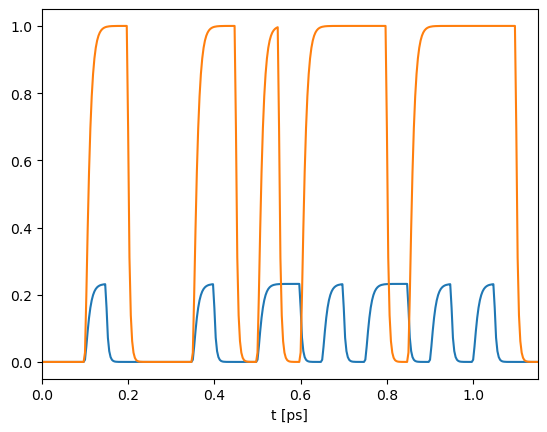

In [13]:
with pt.Environment(t=t):
    vadet = nw(source=vastream.rename("t", "b"))[:,0,0,:]
    ber_err = ber(vadet, vatarget, threshold=float((0.5-bias)/scale))
    mse_err = mse(scale*vadet+bias, vatarget)

    print(f"ber:\t{ber_err}")
    print(f"mse:\t{mse_err.item()}")

    mse.plot(vadet)
    mse.plot(vatarget, latency=0.0)
    plt.xlim(-0,1.15)
    plt.xlabel("t [ps]")
    plt.show()